In [37]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# File system libraries
import os
import pickle

# Project libraries
import utils.lasso_model as lm
from utils.common_viz import model_validation

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #00aaff;">Data Extraction</h2>

In [21]:
# Data extraction
data = pd.read_csv('../dataset/king_country_houses_aa.csv')
df = data.copy()
df.head(10) # Exploring the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
5,7237550310,20140512T000000,1225000.0000,4,4.5000,5420,101930,1.0000,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.0050,4760,101930
6,1321400060,20140627T000000,257500.0000,3,2.2500,1715,6819,2.0000,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.3270,2238,6819
7,2008000270,20150115T000000,291850.0000,3,1.5000,1060,9711,1.0000,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.3150,1650,9711
8,2414600126,20150415T000000,229500.0000,3,1.0000,1780,7470,1.0000,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.3370,1780,8113
9,3793500160,20150312T000000,323000.0000,3,2.5000,1890,6560,2.0000,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.0310,2390,7570


In [22]:
num_df = df.drop(columns = ['id', 'date'])
num_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0000,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,400000.0000,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,402101.0000,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,400000.0000,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


<h2 style="color: #00aaff;">Dealing with multicollinearity</h2>

In [23]:
# Move the price column (target) to the last position for better analysis 
target = num_df.pop("price")
num_df["price"] = target
num_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900.0000
1,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000.0000
2,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000.0000
3,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000.0000
4,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000.0000


In [24]:
num_corr = round(num_df.corr(), 2)

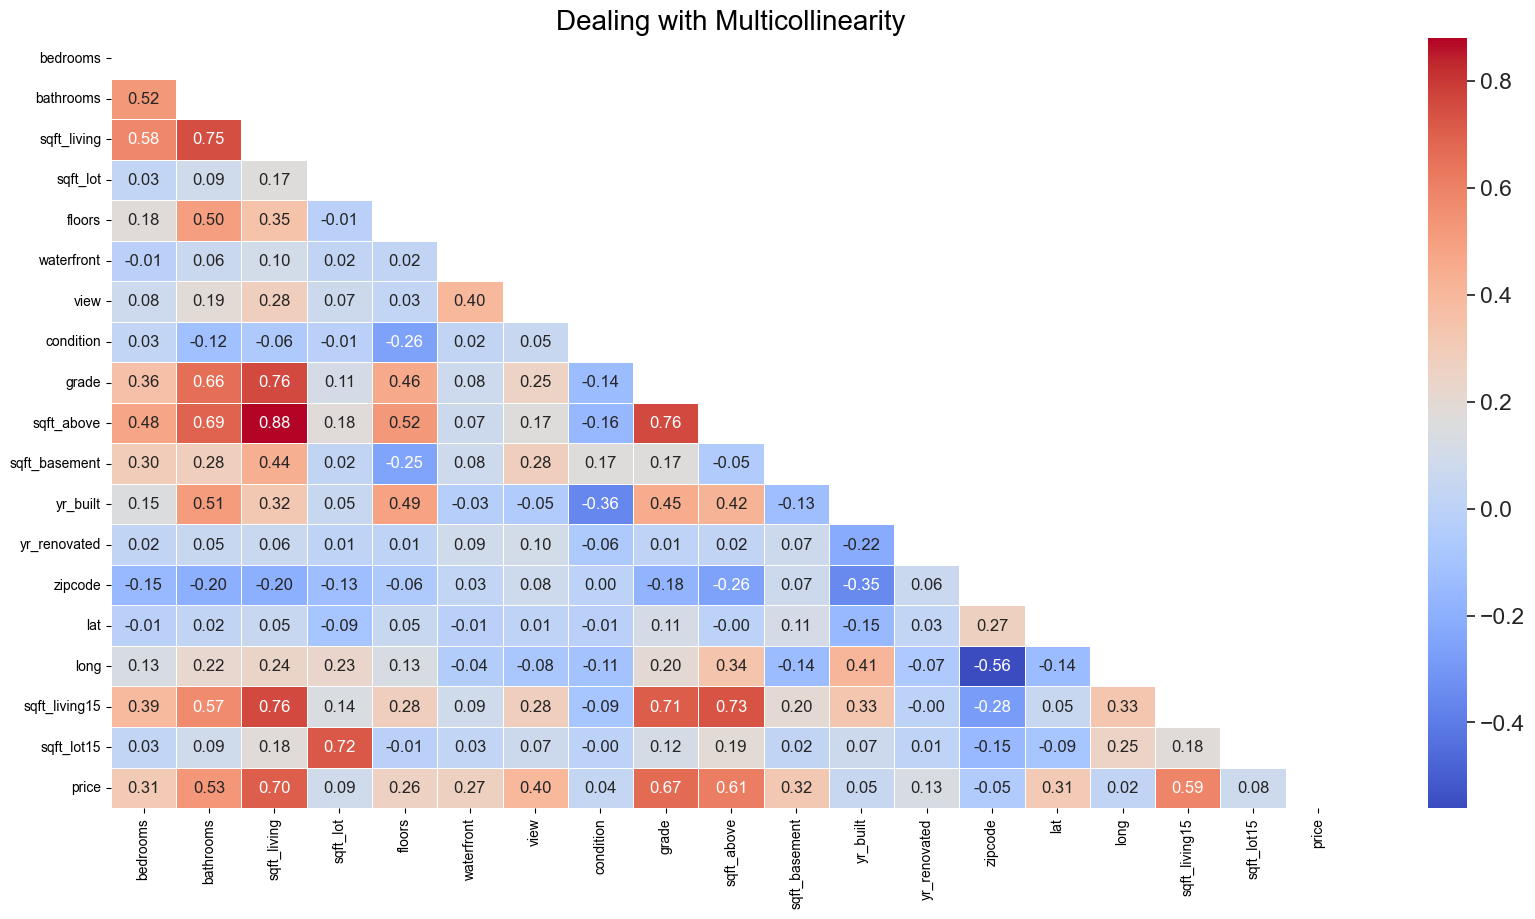

In [9]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

- `sqft_lot` has a high correlation with `sqft_lot15` for doing the regression we will take it out
- `zipcode` has a moderate negative relationship with `long`

In [7]:
ml_df = num_df.drop(columns=['sqft_lot','zipcode'])
ml_df

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


<h1 style="color: #00aaff;">01 | Modeling: Lasso</h1>

### X-y Split

In [25]:
# Split X and y
X = ml_df.drop(columns="price")
y = ml_df.price

### Testing test size for Lasso

In [26]:
l_model = Lasso() # alpha does not impact in R2

In [27]:
# Checking which is the best test_size for Lasso model
random_state = 42
lm.regression_metrics(X, y, ml_df, random_state,l_model,  standardize = True)

10.0% test size
100% of our data: 21613.
90.0% for training data: 19451.
10.0% for test data: 2162.

20.0% test size
100% of our data: 21613.
80.0% for training data: 17290.
20.0% for test data: 4323.

30.0% test size
100% of our data: 21613.
70.0% for training data: 15129.
30.0% for test data: 6484.

40.0% test size
100% of our data: 21613.
60.0% for training data: 12967.
40.0% for test data: 8646.



,test_size,r2,rmse,mse,mae
0,10.0%,0.684,214701.738,46096836456.142,130787.140
1,20.0%,0.695,214562.017,46036859154.748,128272.038
2,30.0%,0.694,210044.088,44118518936.541,127995.889
3,40.0%,0.688,215926.309,46624170995.113,126437.983


### Train-test Split

In [28]:
# 20% of test size is the one with better performance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42) 

<h2 style="color: #00aaff;">Lasso Regression</h2>

### Standardization

In [29]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit and predict

In [30]:
l_model.fit(X_train_scaled, y_train)

Lasso()

In [33]:
predictions_lasso = l_model.predict(X_test_scaled)

<h2 style="color: #00aaff;">Model Validation</h2>

In [34]:
metrics_lasso_df =lm.regression_validation(y_test, predictions_lasso)
metrics_lasso_df

,Metrics,Values
0,R2,0.6955
1,RMSE,214562.0170
2,MSE,46036859154.7478
3,MAE,128272.0381


In [35]:
# Predict on the training and testing sets
lm.test_train_r_analysis(l_model, X_train_scaled, X_test_scaled, y_train, y_test)

R2 train:  0.695
R2 test:  0.695


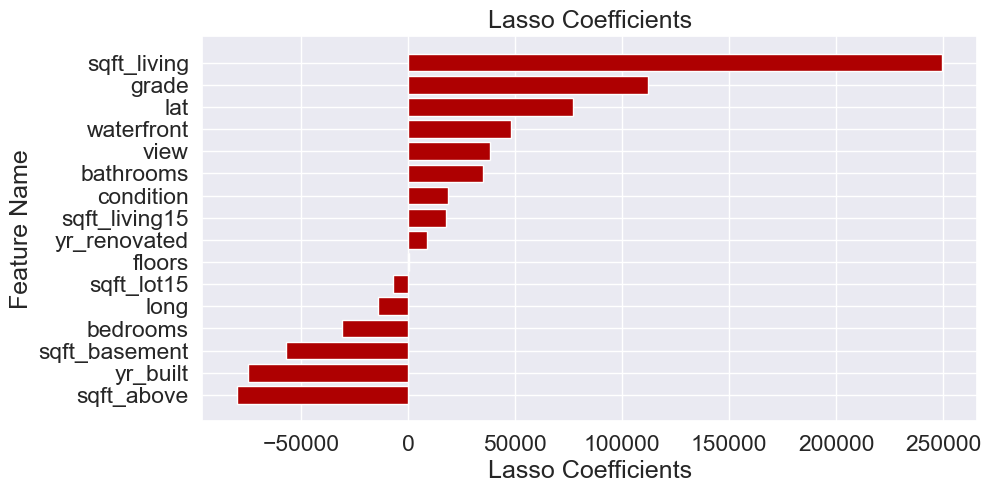

In [23]:
feature_importances = l_model.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#ae0001')
plt.xlabel('Lasso Coefficients')
plt.ylabel('Feature Name')
plt.title('Lasso Coefficients')
plt.gca().invert_yaxis() 
# plt.savefig('plot_lasso.png', transparent=True)
plt.show()

In [25]:
# Save model in pickle
if not os.path.exists('../models/lasso_model.pkl'):  # Check if the file already exists
        # Save the model to a file
    with open('../models/lasso_model.pkl', 'wb') as file:
        pickle.dump(l_model, file)
else:
    print("lasso_model.pkl already exists. File not overwritten.")

lasso_model.pkl already exists. File not overwritten.


<h2 style="color: #00aaff;">Reporting</h2>

In [17]:
## dataframe with actual vs predictions
# Make a dataframe to compare
eval_df = lm.reporting_dataframe(X_test_scaled, y_test, l_model)
eval_df.columns = ['Actual Price','Predicted Price', 'Difference']

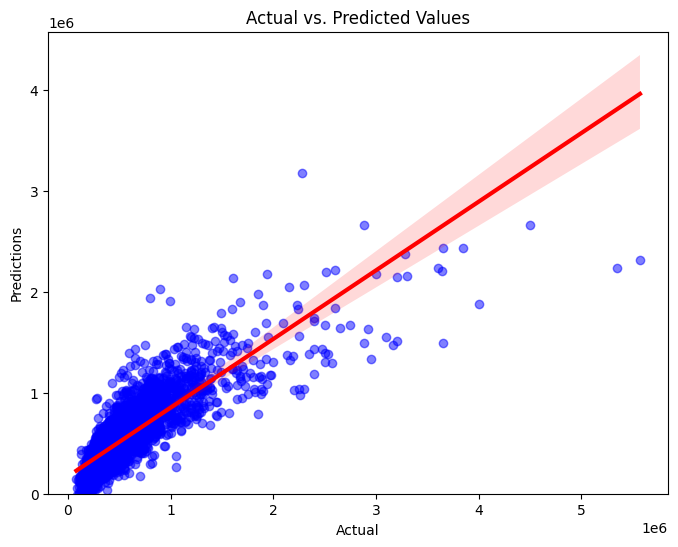

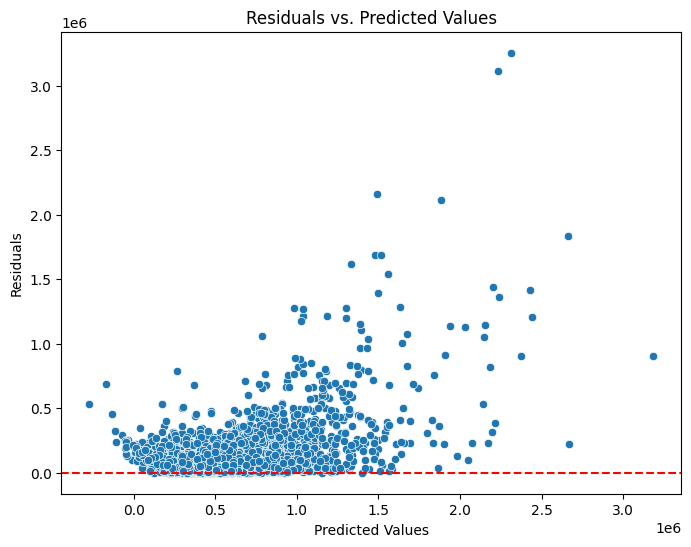

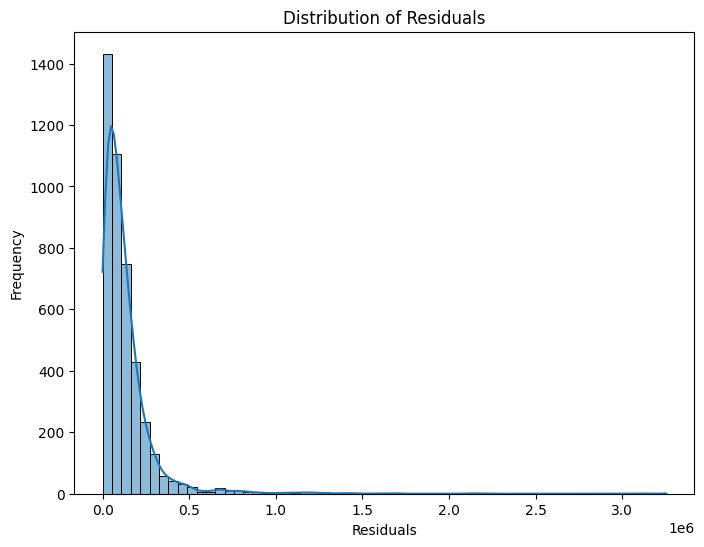

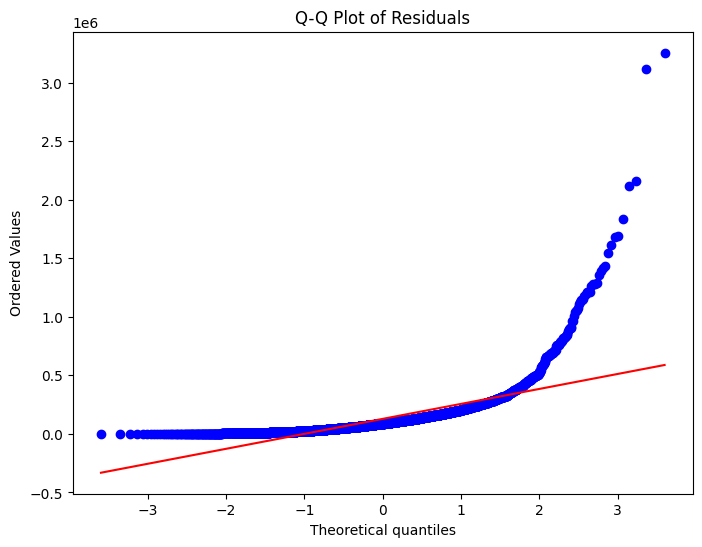

In [36]:
model_validation(eval_df, l_model)